In [92]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

In [93]:
# Load the CSV file
csv_file = Path("Dataset/salaries.csv")
salaries_df = pd.read_csv(csv_file)

# Display sample data
salaries_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [94]:
# Check for missing data
salaries_df.count()

work_year             3006
experience_level      3006
employment_type       3006
job_title             3006
salary                3006
salary_currency       3006
salary_in_usd         3006
employee_residence    3006
remote_ratio          3006
company_location      3006
company_size          3006
dtype: int64

In [95]:
# Identify type of data
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [96]:
# Select companies locate in US
us_df = salaries_df.loc[salaries_df["company_location"]=="US",:]
us_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [97]:
us_df.count()


work_year             2382
experience_level      2382
employment_type       2382
job_title             2382
salary                2382
salary_currency       2382
salary_in_usd         2382
employee_residence    2382
remote_ratio          2382
company_location      2382
company_size          2382
dtype: int64

In [98]:
# how does Remote(work from home or overseas) affect job title, salary

In [99]:
work_overseas = us_df.loc[us_df["company_location"] != us_df["employee_residence"],:]
work_overseas.count()

work_year             40
experience_level      40
employment_type       40
job_title             40
salary                40
salary_currency       40
salary_in_usd         40
employee_residence    40
remote_ratio          40
company_location      40
company_size          40
dtype: int64

In [100]:
work_overseas.head(40)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
108,2023,EN,FT,Data Analyst,100000,USD,100000,UZ,100,US,L
475,2023,EN,FT,Data Analyst,50000,USD,50000,KW,50,US,L
714,2023,EN,FT,Data Analyst,30000,USD,30000,AR,100,US,S
881,2023,EN,FT,Data Scientist,50000,USD,50000,IN,100,US,M
956,2022,EN,PT,Data Analyst,24000,EUR,25216,ES,100,US,L
1169,2022,MI,FT,Data Scientist,2500000,INR,31795,IN,100,US,M
1379,2022,EN,FL,Data Analytics Consultant,50000,USD,50000,BE,100,US,S
1629,2022,EN,PT,BI Analyst,12000,USD,12000,MX,100,US,L
1752,2022,EN,PT,Data Analyst,125404,USD,125404,CN,50,US,S
1954,2022,EN,FT,Data Analyst,20000,USD,20000,CR,50,US,M


In [101]:
work_overseas_grouped = work_overseas.groupby(["job_title"], as_index = False)["salary_in_usd"].mean()
# work_overseas_grouped
job_title_overseas_mean_salary_df= pd.DataFrame(work_overseas_grouped[["job_title","salary_in_usd"]])
job_title_overseas_mean_salary_df["salary_in_usd"] =pd.to_numeric(job_title_overseas_mean_salary_df["salary_in_usd"].map("{:.2f}".format))
job_title_overseas_mean_salary_df=job_title_overseas_mean_salary_df.rename(columns = {"salary_in_usd":"overseas_salary(USD$)"})
job_title_overseas_mean_salary_df


,job_title,overseas_salary(USD$)
0,AI Scientist,74666.67
1,Analytics Engineer,48000.00
2,Applied Machine Learning Scientist,62800.00
3,BI Analyst,12000.00
4,BI Data Analyst,93129.50
5,Cloud Data Engineer,160000.00
6,Computer Vision Engineer,60000.00
7,Computer Vision Software Engineer,95746.00
8,Data Analyst,61517.14
9,Data Analytics Consultant,50000.00


In [102]:
work_local = us_df.loc[us_df["company_location"] == us_df["employee_residence"],:]
work_local.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EN,FT,Data Analyst,75000,USD,75000,US,100,US,M
1,2023,EN,FT,Data Analyst,60000,USD,60000,US,100,US,M
2,2023,MI,FT,Analytics Engineer,185700,USD,185700,US,0,US,M
3,2023,MI,FT,Analytics Engineer,165000,USD,165000,US,0,US,M
4,2023,SE,FT,Data Engineer,160000,USD,160000,US,100,US,M


In [103]:
work_local.count()


work_year             2342
experience_level      2342
employment_type       2342
job_title             2342
salary                2342
salary_currency       2342
salary_in_usd         2342
employee_residence    2342
remote_ratio          2342
company_location      2342
company_size          2342
dtype: int64

In [104]:
# gruped by job_title
work_local_grouped = work_local.groupby(["job_title"], as_index = False)["salary_in_usd"].mean()

#new dataframe 
job_title_local_mean_salary_df= pd.DataFrame(work_local_grouped[["job_title","salary_in_usd"]])
job_title_local_mean_salary_df["salary_in_usd"] =pd.to_numeric(job_title_local_mean_salary_df["salary_in_usd"].map("{:.2f}".format))
job_title_local_mean_salary_df=job_title_local_mean_salary_df.rename(columns = {"salary_in_usd":"local_salary(USD$)"})
job_title_local_mean_salary_df.head()
# job_title_local_mean_salary_df.count()
# work_local_grouped.count()

,job_title,local_salary(USD$)
0,AI Scientist,142500.00
1,Analytics Engineer,155292.86
2,Applied Data Scientist,238000.00
3,Applied Machine Learning Engineer,130000.00
4,Applied Machine Learning Scientist,213500.00


In [105]:
avg_job_title_salary_df= pd.merge(job_title_local_mean_salary_df, job_title_overseas_mean_salary_df, on="job_title")
avg_job_title_salary_df.head(20)

,job_title,local_salary(USD$),overseas_salary(USD$)
0,AI Scientist,142500.00,74666.67
1,Analytics Engineer,155292.86,48000.00
2,Applied Machine Learning Scientist,213500.00,62800.00
3,BI Analyst,121200.00,12000.00
4,BI Data Analyst,77500.00,93129.50
5,Computer Vision Engineer,193000.00,60000.00
6,Computer Vision Software Engineer,70000.00,95746.00
7,Data Analyst,116609.34,61517.14
8,Data Analytics Consultant,113000.00,50000.00
9,Data Engineer,154163.55,58935.00


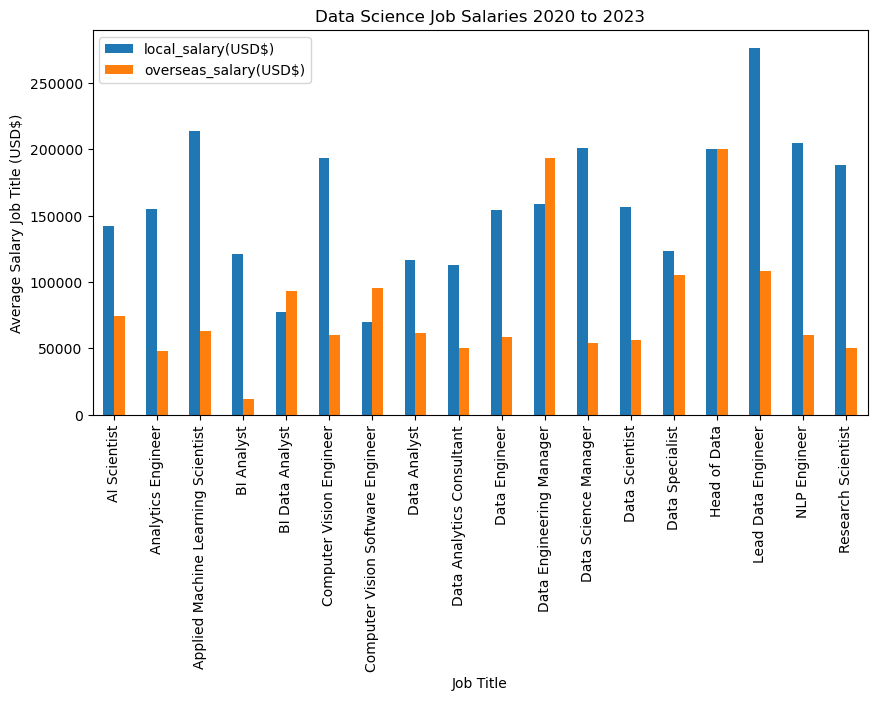

In [106]:
multi_plot = avg_job_title_salary_df.plot(kind="bar", figsize=(10,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(avg_job_title_salary_df["job_title"], rotation=90)
plt.title("Data Science Job Salaries 2020 to 2023")
plt.xlabel('Job Title')
plt.ylabel('Average Salary Job Title (USD$)')
plt.show()
# plt.tight_layout()

In [107]:
# second question
# Identify the relationship between residence(local jobs) and remote(remote jobs) ratio 

The correlation between job local average salary and job overseas average salary is 0.13


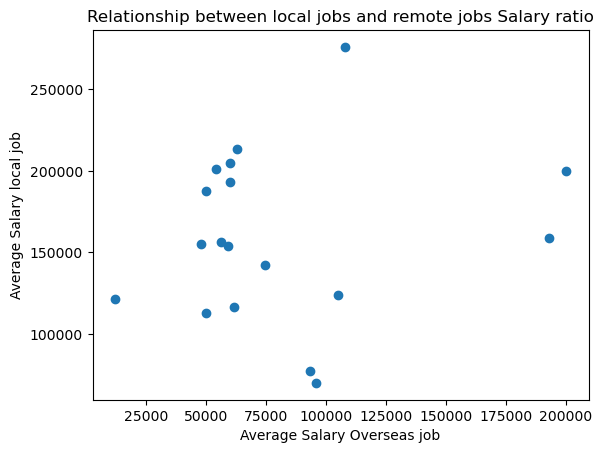

In [110]:
local_mean_salary =avg_job_title_salary_df["local_salary(USD$)"]
overseas_mean_salary = avg_job_title_salary_df["overseas_salary(USD$)"]
correlation = st.pearsonr(overseas_mean_salary,local_mean_salary)
# plt.scatter(x,y)
plt.scatter(overseas_mean_salary,local_mean_salary)
plt.title('Relationship between local jobs and remote jobs Salary ratio')
plt.xlabel('Average Salary Overseas job')
plt.ylabel('Average Salary local job')
print(f"The correlation between job local average salary and job overseas average salary is {round(correlation[0],2)}")
plt.show()